# Generating 10,000 FSPS spectra

In [1]:
# imports and plotting setup
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import fsps
from astroML.plotting import setup_text_plots

np.set_printoptions(suppress=True)
setup_text_plots(fontsize=24)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('font', size=24, family='serif', style='normal', variant='normal', stretch='normal', weight='bold')
mpl.rc('legend', labelspacing=0.1, handlelength=2, fontsize=13)
mpl.rc('axes', labelweight='black')

### Idea for more intelligent way to build up the lists of parameters: nested for loops to iterate over the params of interest, building up equal-length lists, then use zip() to build the actual matrix of model spectra

In [2]:
# set the ranges of parameters we are considering -- 4 parameters (tau, Z, dust2, sigma_smooth) in 10 steps

A = 12.5 # time since the galaxy we're observing started forming stars
sf_begin = 13.7 - A # Gyr after big bang

tau_values = np.logspace(-1, 2, 10) #log-spaced bins from 0.1 - 100 
age_values = A - tau_values * ( (1. - (A/tau_values + 1.) * np.exp(-A/tau_values)) / \
                             (1. - np.exp(-A/tau_values)) ) # mean ages given taus

z_values = np.array([-1.98, -1.58, -1.28, -0.98, -0.69, -0.2, -0.1, 0, 0.1, 0.2])
znum_values = np.array([1, 4, 7, 10, 13, 18, 19, 20, 21, 22])

dust_values = np.linspace(0, 1.5, 10)

sigma_values = np.linspace(0, 300, 10)

In [3]:
taus = []
ages = []
zs = []
znums = []
dusts = []
sigmas = []

steps = 10

for tt in range(steps):
    for zz in range(steps):
        for dd in range(steps):
            for ss in range(steps):
                taus.append(tau_values[tt])
                ages.append(age_values[tt])
                
                zs.append(z_values[zz])
                znums.append(znum_values[zz])
                
                dusts.append(dust_values[dd])
                
                sigmas.append(sigma_values[ss])

In [5]:
spectra = np.zeros((steps**4, 4220)) #know there are 4220 steps in desired wavelength range
ii = 0

for tau, znum, dust, sigma in zip(taus, znums, dusts, sigmas):
    sp = fsps.StellarPopulation(compute_vega_mags=False, sfh=1,  zmet=znum, sigma_smooth=sigma, \
                    dust_type=2, dust2=dust, sf_start=sf_begin, tau=tau, add_neb_emission=False)
    wave, spec = sp.get_spectrum(tage=12.5, peraa=True)
    wh = (wave < 7400.) * (wave > 3600.)
    spectra[ii, :] = spec[wh]
    ii += 1
    if ii%500 == 0:
        percent = ii/100
        print "%d percent complete" % percent

1 complete
2 complete
3 complete
4 complete
5 complete
6 complete
7 complete
8 complete
9 complete
10 complete
11 complete
12 complete
13 complete
14 complete
15 complete
16 complete
17 complete
18 complete
19 complete
20 complete
21 complete
22 complete
23 complete
24 complete
25 complete
26 complete
27 complete
28 complete
29 complete
30 complete
31 complete
32 complete
33 complete
34 complete
35 complete
36 complete
37 complete
38 complete
39 complete
40 complete
41 complete
42 complete
43 complete
44 complete
45 complete
46 complete
47 complete
48 complete
49 complete
50 complete
51 complete
52 complete
53 complete
54 complete
55 complete
56 complete
57 complete
58 complete
59 complete
60 complete
61 complete
62 complete
63 complete
64 complete
65 complete
66 complete
67 complete
68 complete
69 complete
70 complete
71 complete
72 complete
73 complete
74 complete
75 complete
76 complete
77 complete
78 complete
79 complete
80 complete
81 complete
82 complete
83 complete
84 complete
8

### Normalize the spectra

In [9]:
norms = spectra.shape[1] / np.sum(spectra, axis=1)
spectra_norm = spectra * norms[:,np.newaxis]

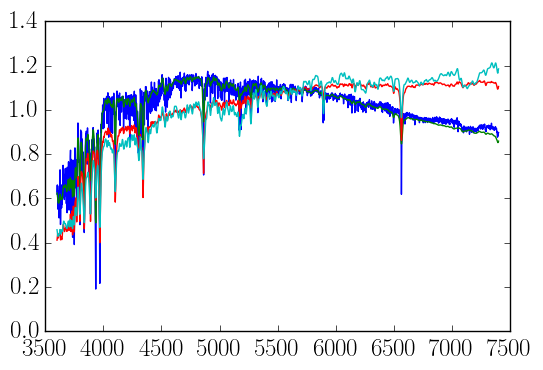

In [11]:
plt.figure()
plt.plot(wave[wh], spectra_norm[100])
plt.plot(wave[wh], spectra_norm[1009])
plt.plot(wave[wh], spectra_norm[6095])
plt.plot(wave[wh], spectra_norm[9998])

### Save the spectra and parameter lists to an HDF5 file

In [14]:
import h5py

In [15]:
f = h5py.File('../data/1e4_model_spectra.hdf5','a')
f.create_dataset('spectra', data=spectra_norm)
f.create_dataset('wave', data=wave[wh])
f.create_dataset('taus', data=taus)
f.create_dataset('ages', data=ages)
f.create_dataset('znums', data=znums)
f.create_dataset('zs', data=zs)
f.create_dataset('dusts', data=dusts)
f.create_dataset('sigmas', data=sigmas)

<HDF5 dataset "sigmas": shape (10000,), type "<f8">

In [16]:
f.keys()

[u'ages', u'dusts', u'sigmas', u'spectra', u'taus', u'wave', u'znums', u'zs']

In [17]:
f['spectra'].shape

(10000, 4220)

In [18]:
f.close()